In [3]:
pip install ucimlrepo

In [9]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import loguniform


In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [13]:
df = pd.concat([X, y], axis=1)
print("Shape of dataset:", df.shape)


Shape of dataset: (5620, 65)


In [14]:
print("Data types:\n", df.dtypes)


Data types:
 Attribute1     int64
Attribute2     int64
Attribute3     int64
Attribute4     int64
Attribute5     int64
               ...  
Attribute61    int64
Attribute62    int64
Attribute63    int64
Attribute64    int64
class          int64
Length: 65, dtype: object


In [15]:
print("First 5 rows:\n", df.head())


First 5 rows:
    Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           1           6          15          12           1   
1           0           0          10          16           6           0   
2           0           0           8          15          16          13   
3           0           0           0           3          11          16   
4           0           0           5          14           4           0   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute56  \
0           0           0           0            7  ...            0   
1           0           0           0            7  ...            0   
2           0           0           0            1  ...            0   
3           0           0           0            0  ...            0   
4           0           0           0            0  ...            0   

   Attribute57  Attribute58  Attribute59  Attribute60  Attribute61  \
0            0    

In [16]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
              ..
Attribute61    0
Attribute62    0
Attribute63    0
Attribute64    0
class          0
Length: 65, dtype: int64


In [18]:
print("Summary statistics:\n", df.describe())

Summary statistics:
        Attribute1   Attribute2   Attribute3   Attribute4   Attribute5  \
count      5620.0  5620.000000  5620.000000  5620.000000  5620.000000   
mean          0.0     0.302135     5.393238    11.815480    11.578292   
std           0.0     0.879962     4.672719     4.255952     4.462546   
min           0.0     0.000000     0.000000     0.000000     0.000000   
25%           0.0     0.000000     1.000000    10.000000     9.000000   
50%           0.0     0.000000     5.000000    13.000000    13.000000   
75%           0.0     0.000000     9.000000    15.000000    15.000000   
max           0.0     8.000000    16.000000    16.000000    16.000000   

        Attribute6   Attribute7   Attribute8   Attribute9  Attribute10  ...  \
count  5620.000000  5620.000000  5620.000000  5620.000000  5620.000000  ...   
mean      5.593772     1.379359     0.138256     0.003203     1.971174  ...   
std       5.631149     3.356633     1.046998     0.090423     3.098815  ...   
min  

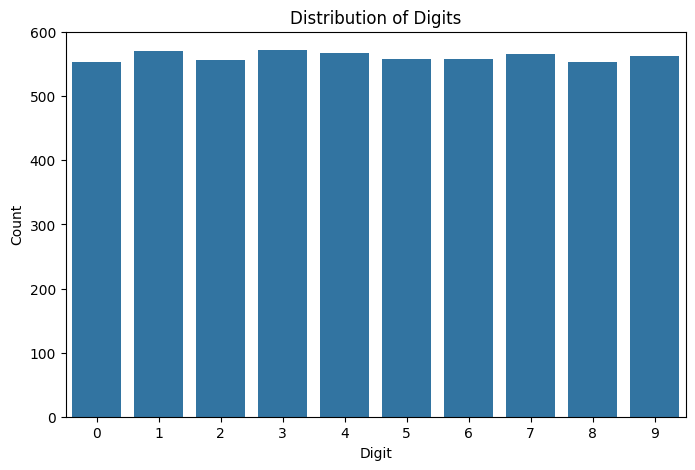

In [20]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x=df.columns[-1], data=df)
plt.title("Distribution of Digits")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

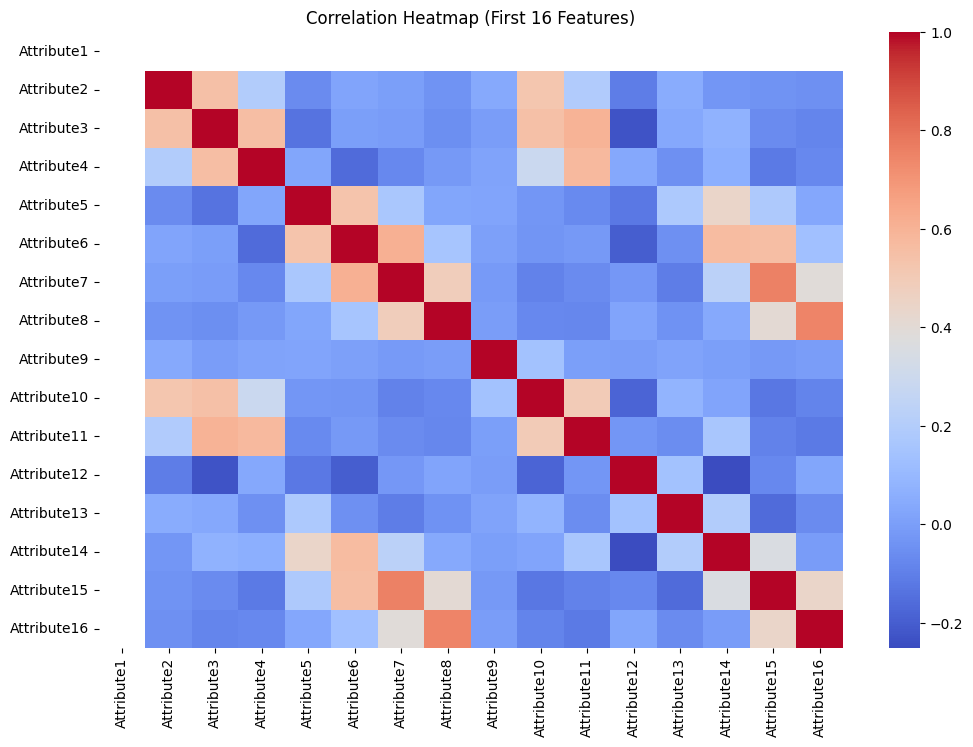

In [21]:
plt.figure(figsize=(12, 8))
subset = df.iloc[:, :16]  # first 16 features
sns.heatmap(subset.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (First 16 Features)")
plt.show()

In [10]:
# Scale the data (critical for SVM performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
param_dist = {
    'kernel': ['rbf', 'linear', 'sigmoid'],
    'C': loguniform(0.1, 100),
    'gamma': ['scale', 'auto']
}


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Table 1: Comparative performance of Optimized-SVM with different samples
  Sample #  Best Accuracy                                Best SVM Parameters
0       S1         0.9792  {'C': 5.073432032394333, 'gamma': 'scale', 'ke...
1       S2         0.9893  {'C': 3.014246606415109, 'gamma': 'scale', 'ke...
2       S3         0.9864  {'C': 12.787708341926468, 'gamma': 'auto', 'ke...
3       S4         0.9822  {'C': 2.311124275759298, 'gamma': 'auto', 'ker...
4       S5         0.9887  {'C': 82.80433617942744, 'gamma': 'auto', 'ker...
5       S6         0.9864  {'C': 6.545323797555708, 'gamma': 'auto', 'ker...
6       S7         0.9846  {'C': 2.438274635819787, 'gamma': 'scale', 'ke...
7       S8         0.9899  {'C': 40.40214050369614, 'gamma': 'auto', 'ker...
8       S9         0.9840  {'C': 2.43826124388798, 'gamma': 'auto', 'kern...
9      S10         0.9905  {'C': 87.46446671013472, 'gamma': 'auto', 'ker...


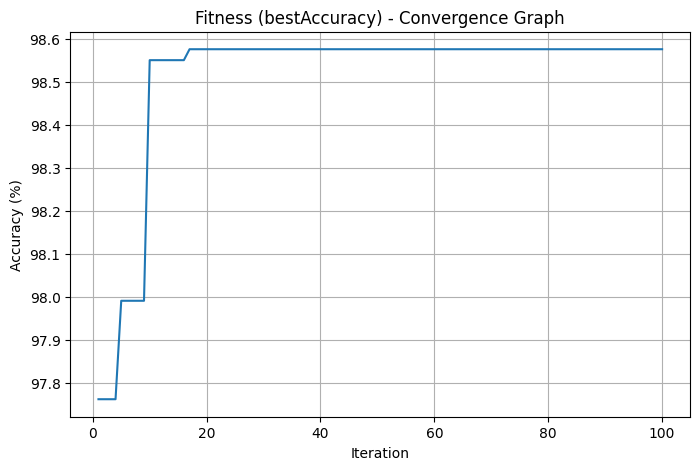

In [8]:
results = []
all_convergence = []

for i in range(10):
    # 70-30 split with different random_state
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=i, stratify=y
    )

    # Use a smaller subset for initial search if dataset is large
    use_sample = (len(X_train) > 5000)
    if use_sample:
        X_sample, _, y_sample, _ = train_test_split(
            X_train, y_train, train_size=0.3, random_state=i
        )
    else:
        X_sample, y_sample = X_train, y_train

    # SVM with RandomizedSearchCV
    svm = SVC(cache_size=1000)  # Increase cache size
    random_search = RandomizedSearchCV(
        estimator=svm,
        param_distributions=param_dist,
        n_iter=100,
        scoring='accuracy',
        n_jobs=4,  # Adjust based on your system
        cv=3,
        random_state=i,
        verbose=1  # Set to 1 to monitor progress
    )

    try:
        # Add timeout or catch interruptions
        random_search.fit(X_sample, y_sample)

        # If using a sample, retrain best model on full training data
        if use_sample:
            best_model = SVC(**random_search.best_params_, cache_size=1000)
            best_model.fit(X_train, y_train)
        else:
            best_model = random_search.best_estimator_

        # Test accuracy
        y_pred = best_model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)

        # Store results
        results.append({
            'Sample #': f'S{i+1}',
            'Best Accuracy': np.round(test_acc, 4),
            'Best SVM Parameters': random_search.best_params_
        })

        # Store convergence info
        cv_results = random_search.cv_results_['mean_test_score']
        best_so_far = np.maximum.accumulate(cv_results)
        all_convergence.append(best_so_far)

    except KeyboardInterrupt:
        print(f"Search interrupted for sample {i+1}. Moving to next sample.")
        continue

# Results table (if any results were collected)
if results:
    results_df = pd.DataFrame(results)
    print("\nTable 1: Comparative performance of Optimized-SVM with different samples")
    print(results_df)

    # Plot convergence for best sample if available
    if all_convergence:
        best_idx = results_df['Best Accuracy'].idxmax()
        best_convergence = all_convergence[best_idx]

        plt.figure(figsize=(8, 5))
        plt.plot(np.arange(1, len(best_convergence)+1), best_convergence * 100)
        plt.xlabel('Iteration')
        plt.ylabel('Accuracy (%)')
        plt.title('Fitness (bestAccuracy) - Convergence Graph')
        plt.grid()
        plt.show()
else:
    print("No results collected. All searches were interrupted.")
